In [1]:
import os

In [2]:
from matplotlib.image import imread

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import math

Information taken from https://github.com/cs-chan/Exclusively-Dark-Image-Dataset <br>

Bicycle - 652 images <br>
Boat - 679 images <br>
Bottle - 547 images <br>
Bus - 527 images <br>
Car - 638 images <br>
Cat - 735 images <br>
Chair - 648 images <br>
Cup - 519 images <br>
Dog - 801 images <br>
Motorbike - 503 images <br>
People - 609 images <br>
Table - 505 images <br>

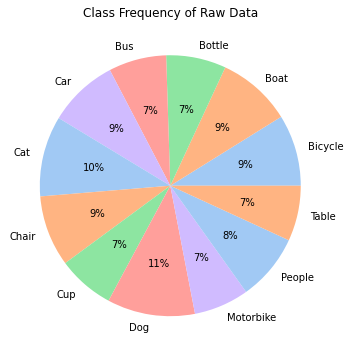

In [5]:
data = [652,679,547,527,638,735,648,519,801,503,609,505]
labels = ['Bicycle', 'Boat', 'Bottle', 'Bus', 'Car', 'Cat', 'Chair', 'Cup', 'Dog', 'Motorbike', 'People', 'Table']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10,6))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Class Frequency of Raw Data')
plt.show()

In [7]:
sum([652,679,547,527,638,735,648,519,801,503,609,505])

7363

In [8]:
data_dir = 'C:\\Users\\91882\\Desktop\\PA review 1\\ExDark\\ExDark\\'

In [9]:
os.listdir(data_dir)

['Bicycle',
 'Boat',
 'Bottle',
 'Bus',
 'Car',
 'Cat',
 'Chair',
 'Cup',
 'Dog',
 'Motorbike',
 'People',
 'Table']

In [10]:
discarded_imgs = []

In [11]:
keys = os.listdir(data_dir)
values = np.zeros(len(keys))

class_freq = dict(zip(keys,values))

In [12]:
# Some corrupted images had to be removed by hand
# 

In [19]:
dim1 = []
dim2 = []

for img_class in os.listdir(data_dir):
    for img_filename in os.listdir(data_dir+img_class):
        path = data_dir+img_class+'\\'+img_filename
        img = imread(path)
        d1,d2 = img.shape[0],img.shape[1]
        dim1.append(d1)
        dim2.append(d2)

In [20]:
len(dim2)

7358

In [21]:
len(dim1)

7358

C:\Users\91882\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Height and Width of images')

<Figure size 720x432 with 0 Axes>

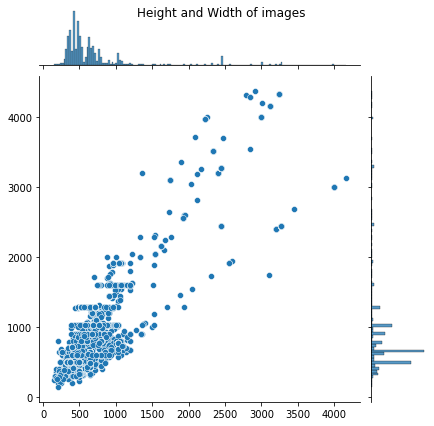

In [22]:
plt.figure(figsize=(10,6))
p = sns.jointplot(dim1,dim2)
p.fig.suptitle("Height and Width of images")

In [23]:
np.mean(dim1)

649.180076107638

In [24]:
np.mean(dim2)

819.1571079097581

In [25]:
# Visualizing 1st image of each class

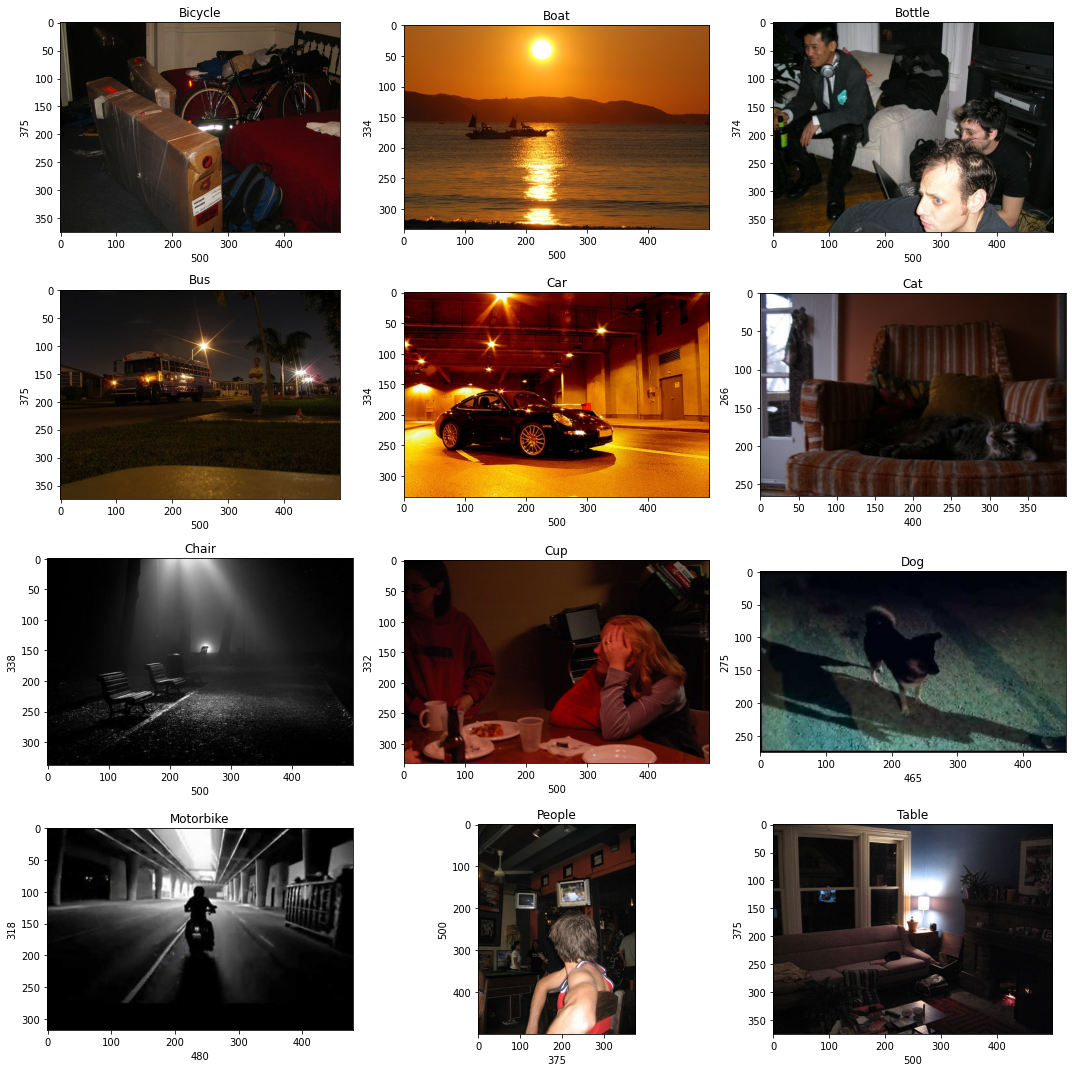

In [26]:
plt.figure(figsize=(15,15))
i=1
for img_class in os.listdir(data_dir):
    plt.subplot(4,3,i)
    i=i+1
    first_img = os.listdir(data_dir+img_class)[0]
    img = plt.imread(data_dir+img_class+'\\'+first_img)
    plt.imshow(img)
    plt.title(img_class)
    plt.xlabel(img.shape[1],fontsize=10)
    plt.ylabel(img.shape[0],fontsize=10)
    plt.tight_layout()
    

In [27]:
# Visualizing Histogram of color channels of 1st image of each class

In [28]:
import cv2

In [29]:
lis1 = ['Bicycle','Boat','Bottle','Bus','Car','Cat']

In [30]:
lis2 = ['Chair','Cup','Dog','Motorbike','People','Table']

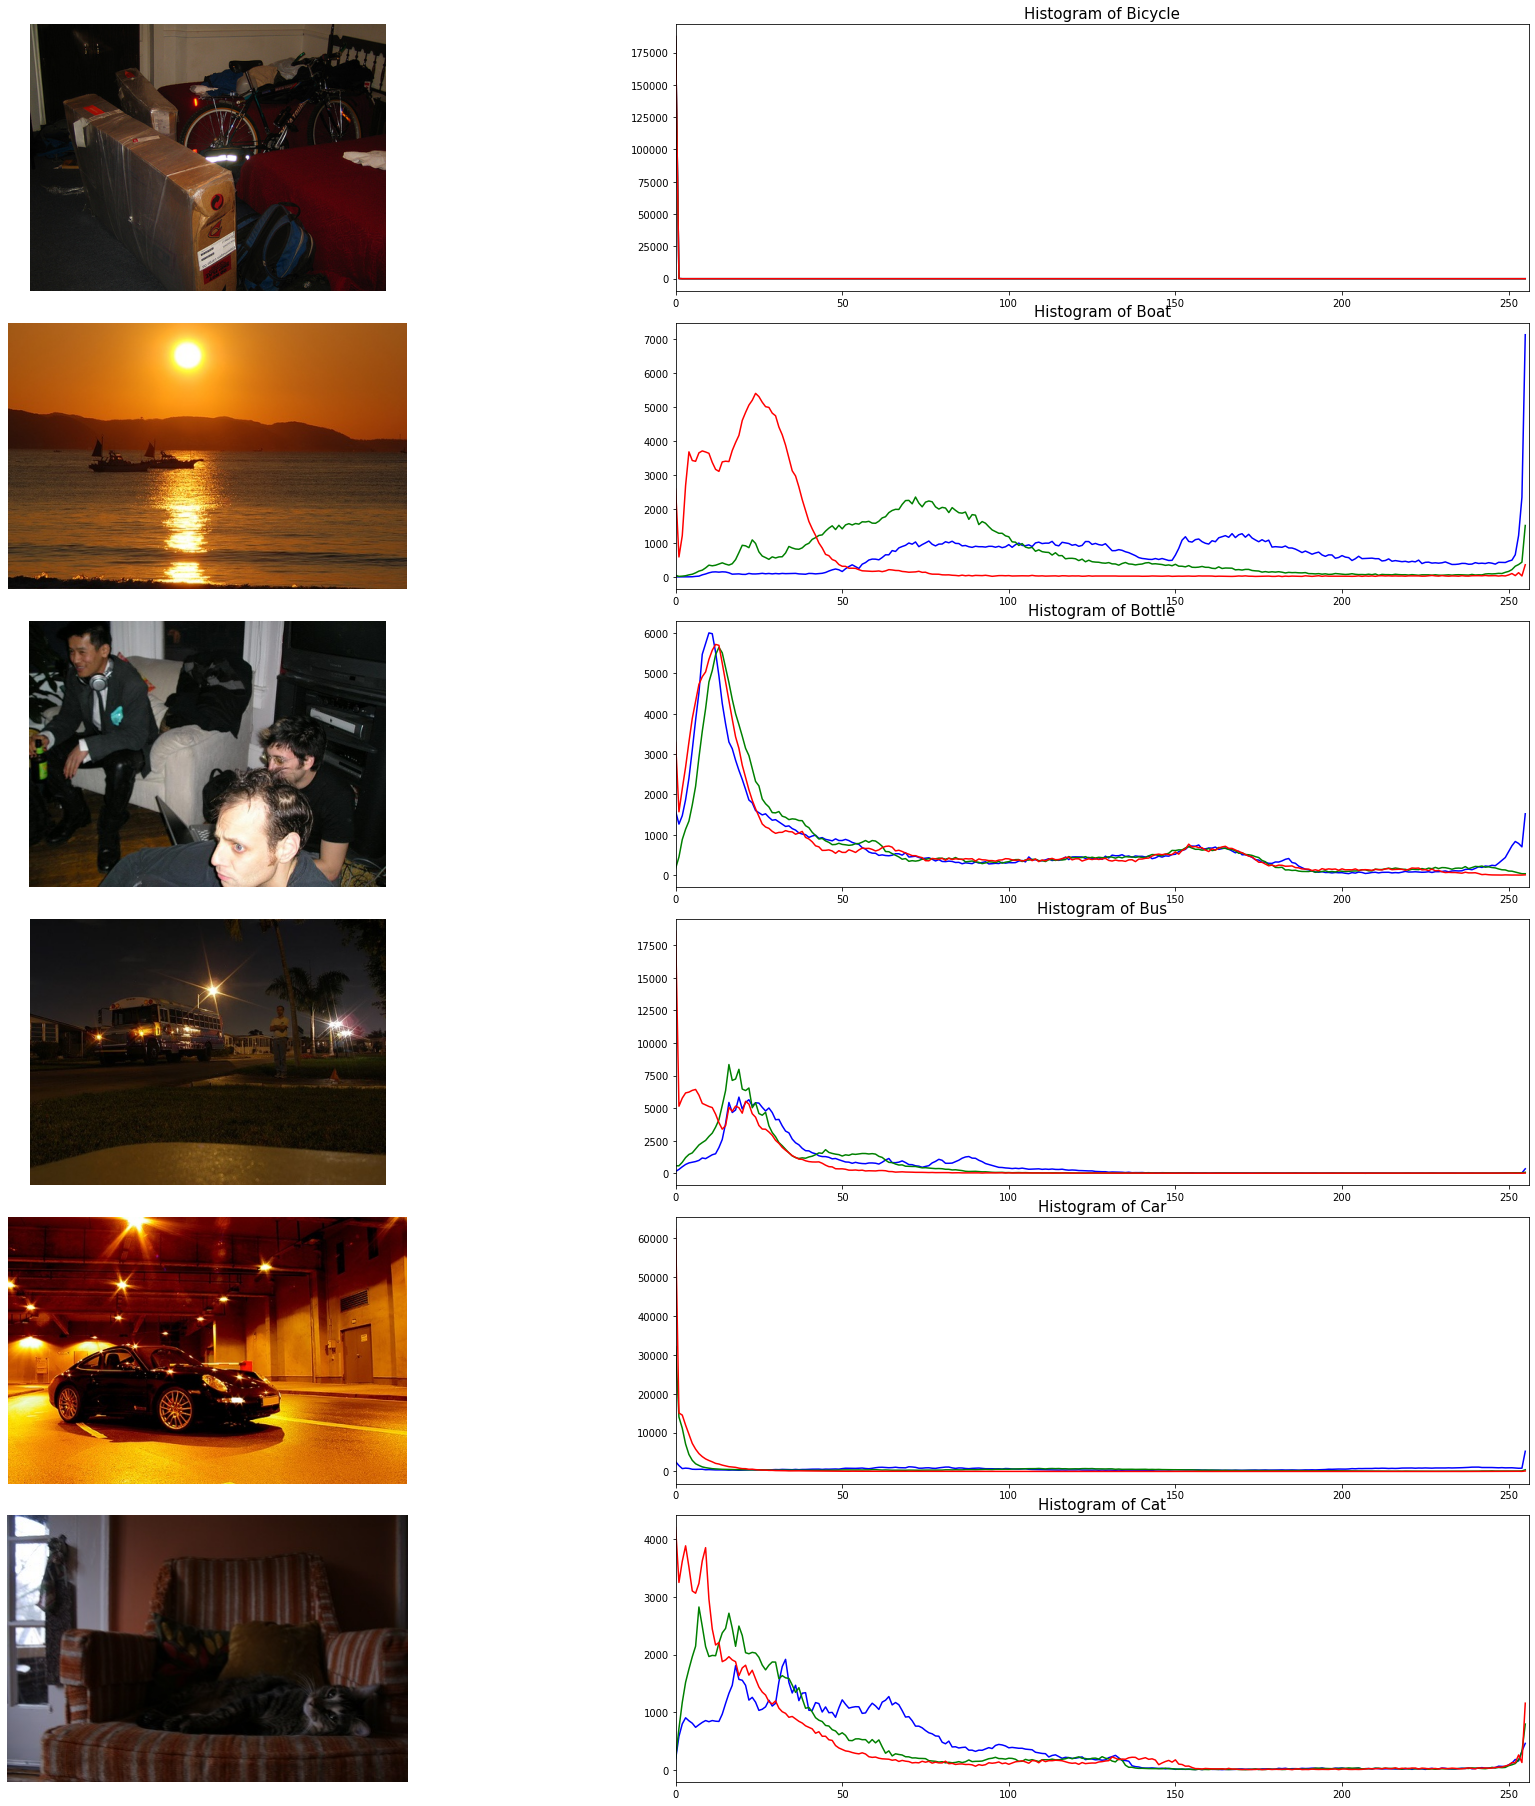

In [31]:
i=0
fig, axes = plt.subplots(6,2,figsize=(25, 25))
plt.tight_layout()

for img_class in lis1:
    

    first_img = os.listdir(data_dir+img_class)[0]
    img = plt.imread(data_dir+img_class+'\\'+first_img)

    axes[i,0].imshow(img)
    axes[i,0].axis('off')

    color = ('b','g','r')

    for j,col in enumerate(color):
        histr = cv2.calcHist([img],[j],mask=None,histSize=[256],ranges=[0,256])
        axes[i,1].plot(histr,color=col)
        axes[i,1].set_xlim([0,256])

        axes[i,1].set_title('Histogram of '+img_class,fontsize=15)
    
    i=i+1



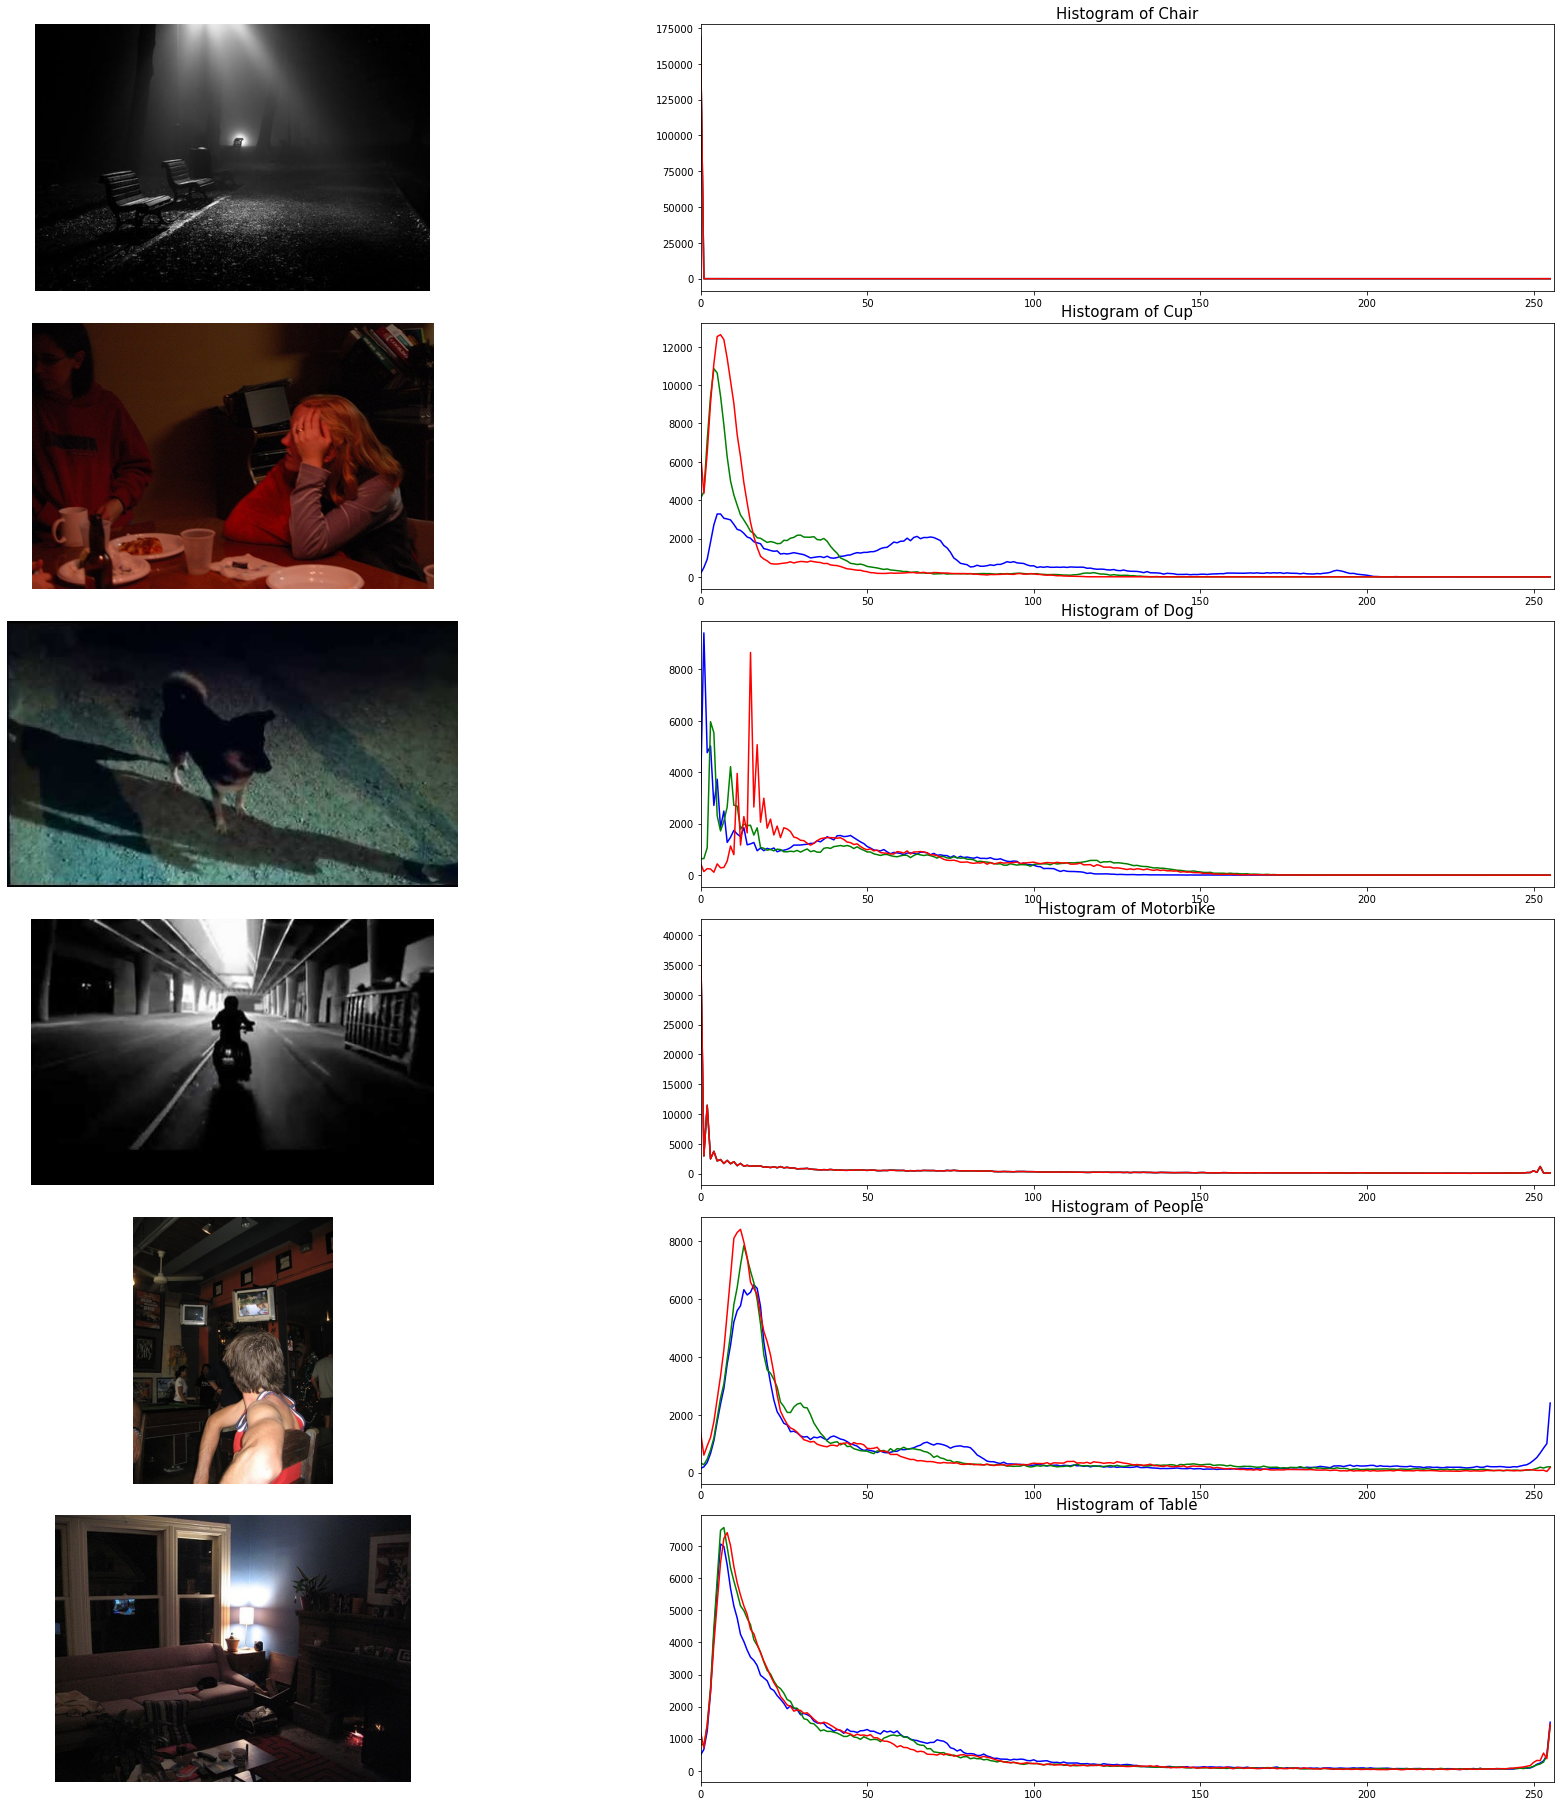

In [32]:
i=0
fig, axes = plt.subplots(6,2,figsize=(25, 25))
plt.tight_layout()

for img_class in lis2:
    

    first_img = os.listdir(data_dir+img_class)[0]
    img = plt.imread(data_dir+img_class+'\\'+first_img)

    axes[i,0].imshow(img)
    axes[i,0].axis('off')

    color = ('b','g','r')

    for j,col in enumerate(color):
        histr = cv2.calcHist([img],[j],mask=None,histSize=[256],ranges=[0,256])
        axes[i,1].plot(histr,color=col)
        axes[i,1].set_xlim([0,256])

        axes[i,1].set_title('Histogram of '+img_class,fontsize=15)
    
    i=i+1



In [33]:
path = 'C:\\Users\\91882\\Desktop\\PA review 1\\types of Low light images.jpg'
types_LL_img = plt.imread(path)

Image taken from https://github.com/cs-chan/Exclusively-Dark-Image-Dataset

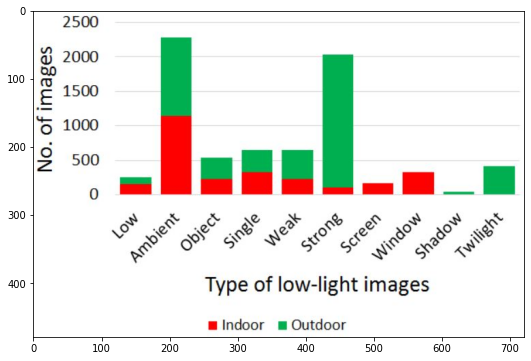

In [34]:
plt.figure(figsize=(10,6))
plt.imshow(types_LL_img)

Code Reference : https://stackoverflow.com/questions/61695773/how-to-set-the-best-value-for-gamma-correction

In [35]:
def optimal_gamma(path):
    img = cv2.imread(path,0)
    mid = 0.5
    mean = np.mean(img)
    gamma = math.log(mid*255)/math.log(mean)
    img_gamma = np.power(img, gamma).clip(0,255).astype(np.uint8)
    return img_gamma

Converting images to grayscale as it is not important for object detection in our case. <br>
https://stackoverflow.com/questions/45320545/impact-of-converting-image-to-grayscale

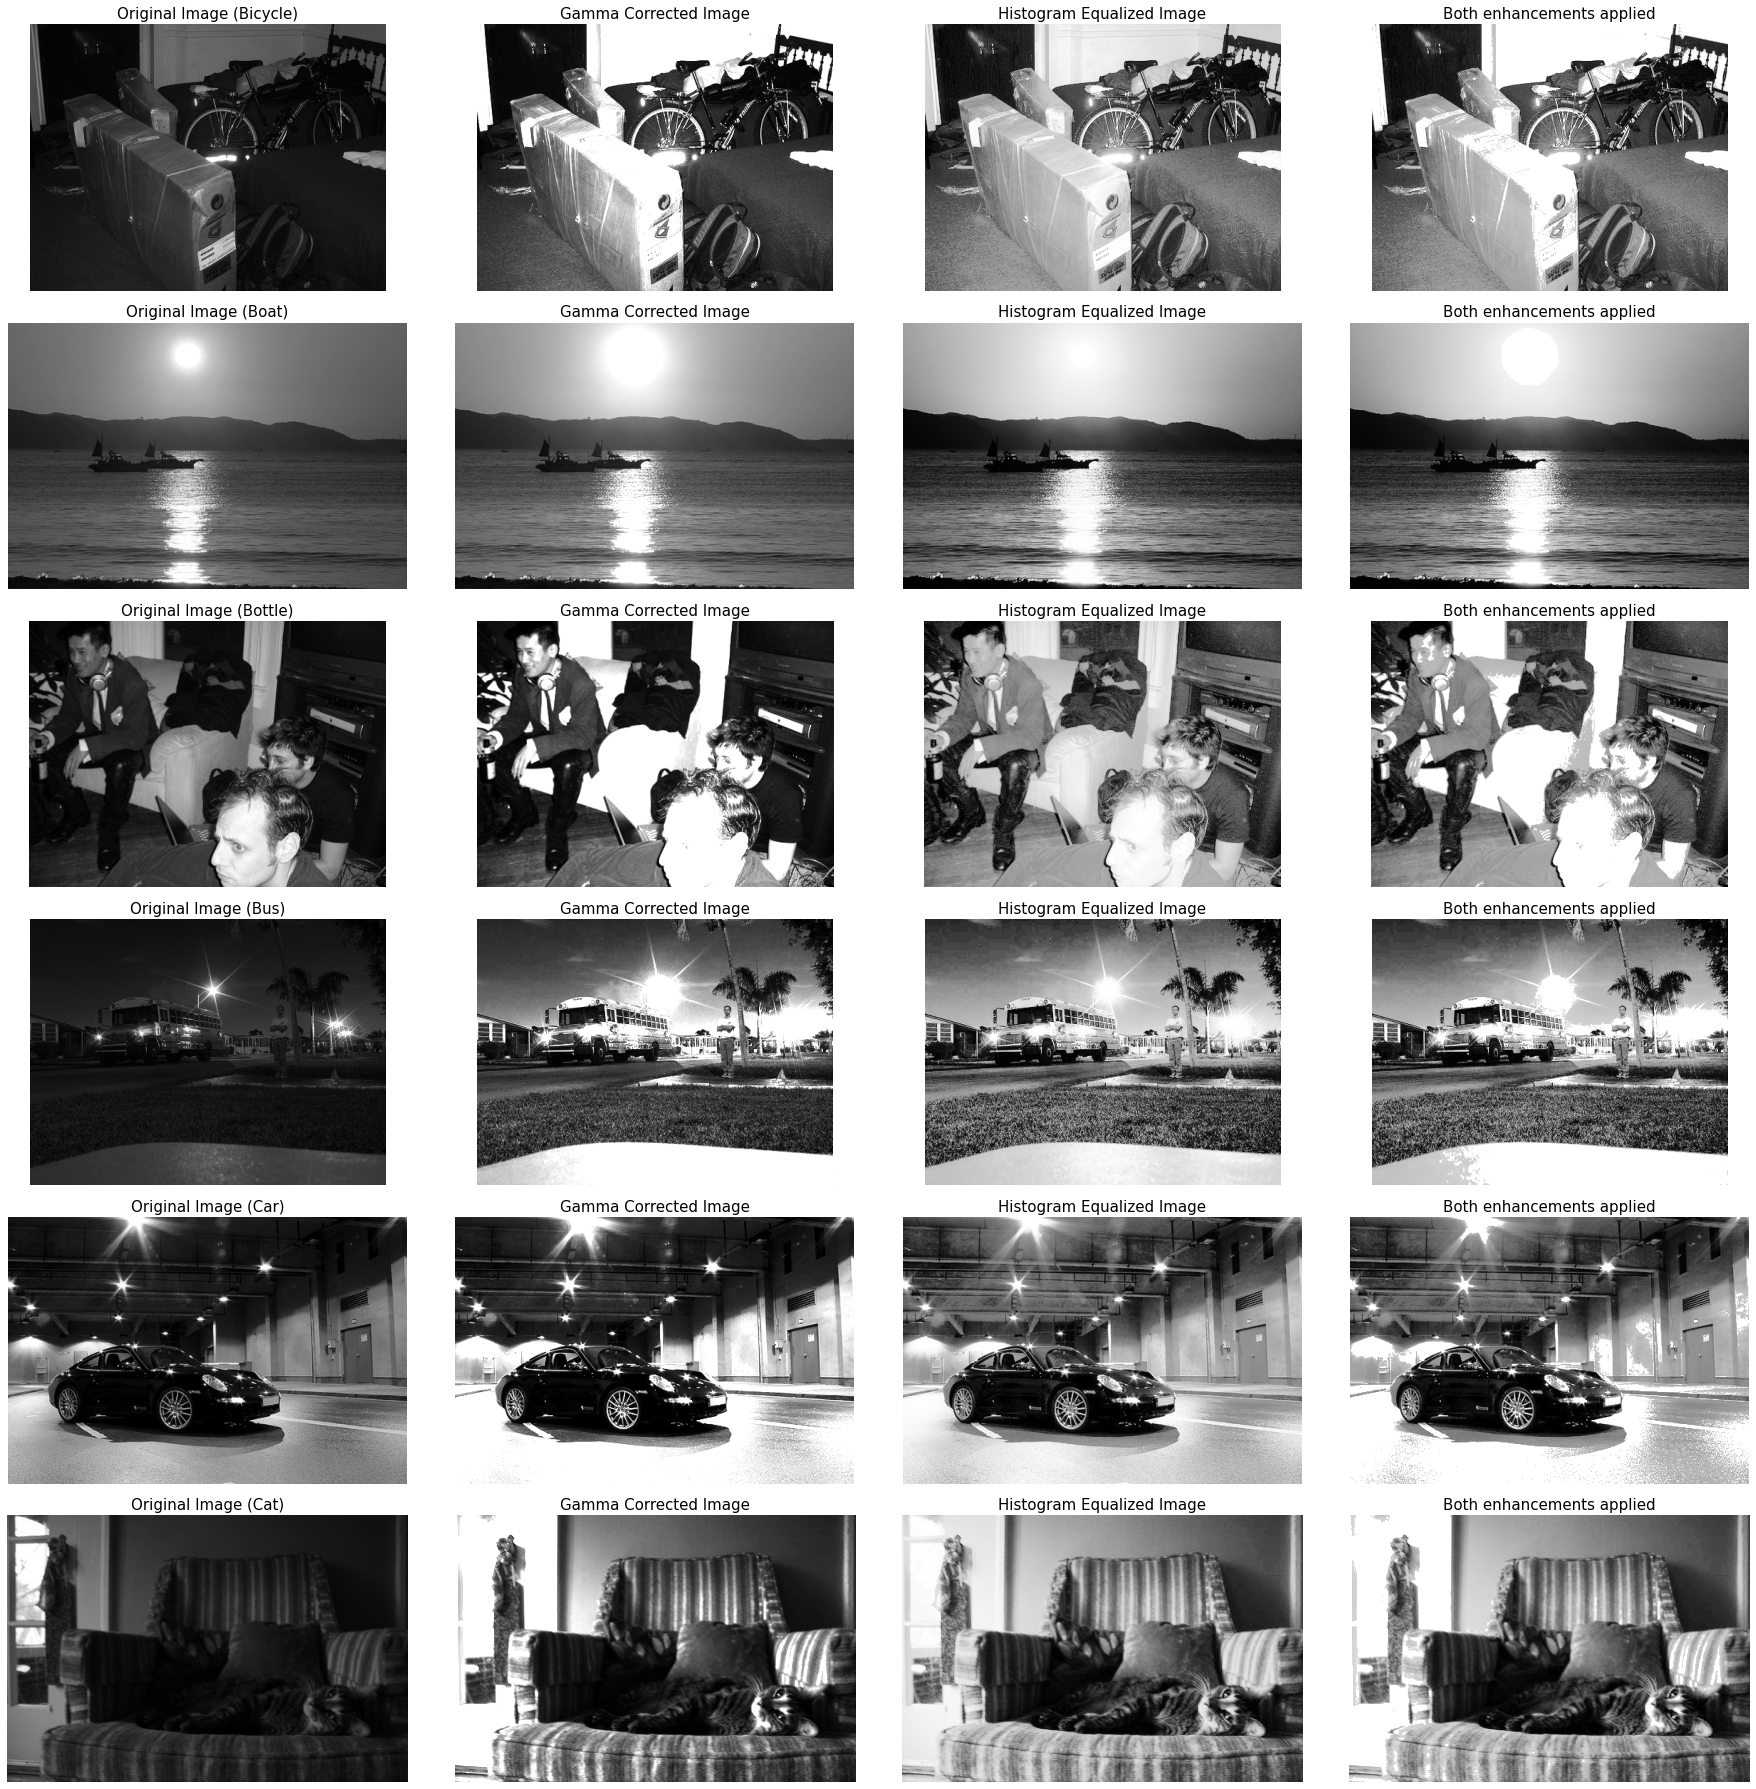

In [36]:
i=0
fig, axes = plt.subplots(6,4,figsize=(25, 25))
plt.tight_layout()

for img_class in lis1:
    

    first_img = os.listdir(data_dir+img_class)[0]
    img = cv2.imread(data_dir+img_class+'\\'+first_img,0) # Reading image as grayscale
    
    
    # Normal Image
    axes[i,0].imshow(img,cmap='gray')
    axes[i,0].axis('off')
    axes[i,0].set_title(f'Original Image ({img_class})',fontsize=15)

    # Gamma Corrected Image
    gamma_corrected_img = optimal_gamma(data_dir+img_class+'\\'+first_img)
    axes[i,1].imshow(gamma_corrected_img,cmap='gray')
    axes[i,1].axis('off')
    axes[i,1].set_title('Gamma Corrected Image',fontsize=15)
    
    # Histogram equalized image
    img = cv2.imread(data_dir+img_class+'\\'+first_img,0)
    eq_img = cv2.equalizeHist(img)
    axes[i,2].imshow(eq_img,cmap='gray')
    axes[i,2].axis('off')
    axes[i,2].set_title('Histogram Equalized Image',fontsize=15)
    
    # Both
    eq_img_gamma_corr = cv2.equalizeHist(gamma_corrected_img)
    axes[i,3].imshow(eq_img_gamma_corr,cmap='gray')
    axes[i,3].axis('off')
    axes[i,3].set_title('Both enhancements applied',fontsize=15)
    
    i=i+1



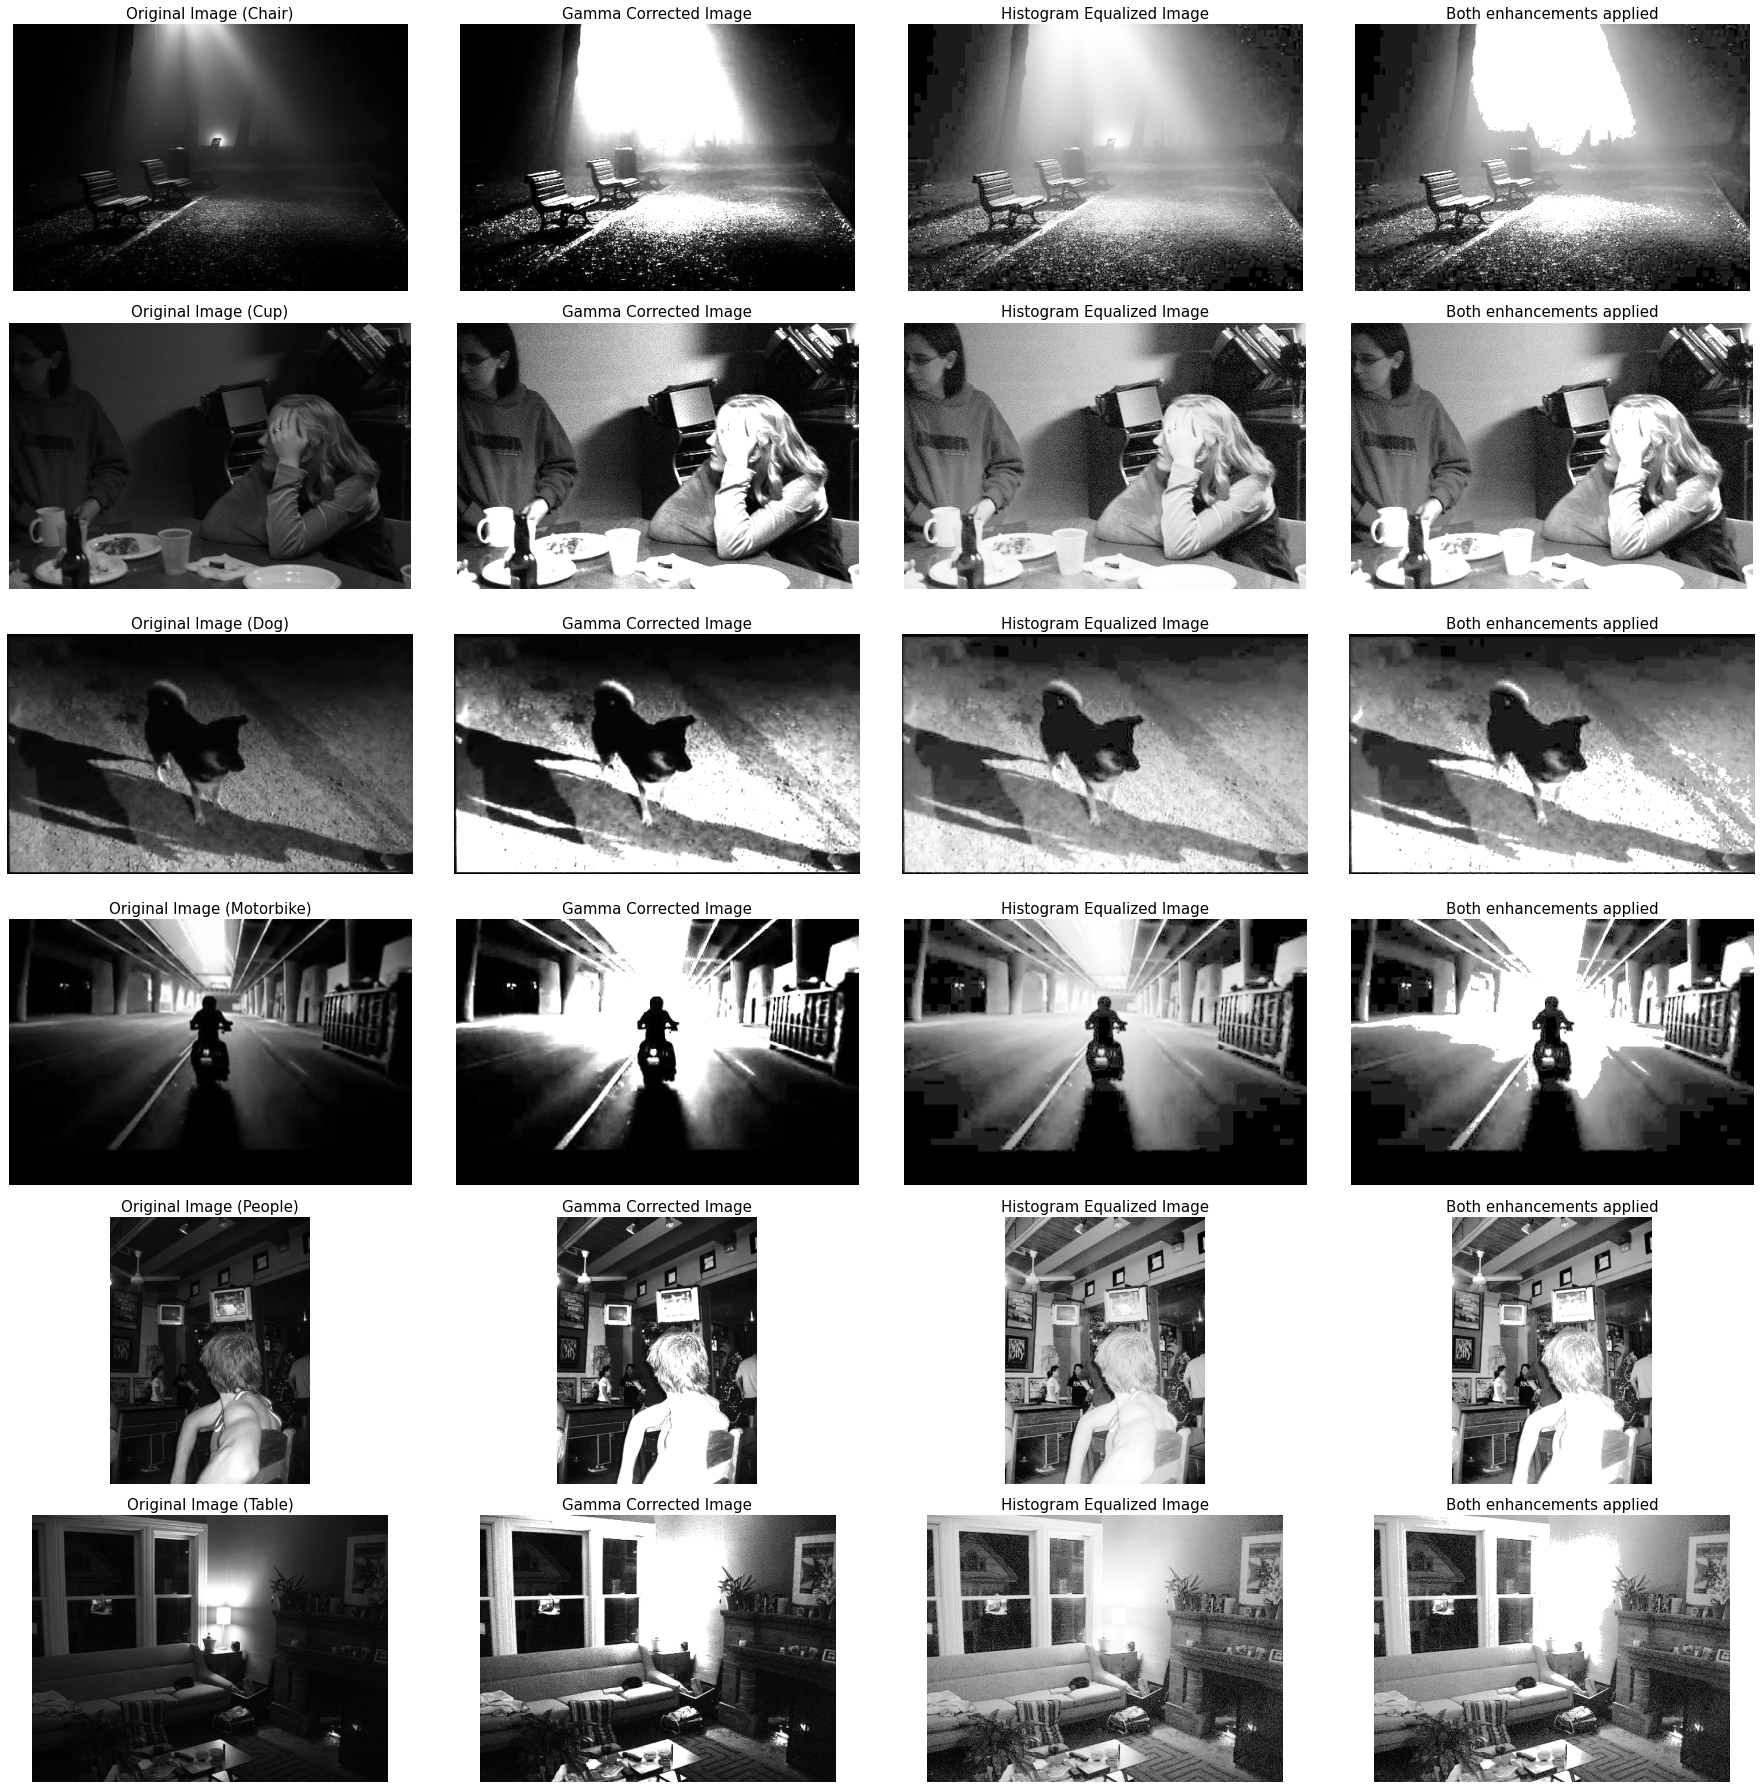

In [37]:
i=0
fig, axes = plt.subplots(6,4,figsize=(25, 25))
plt.tight_layout()

for img_class in lis2:
    

    first_img = os.listdir(data_dir+img_class)[0]
    img = cv2.imread(data_dir+img_class+'\\'+first_img,0) # Reading image as grayscale
    
    
    # Normal Image
    axes[i,0].imshow(img,cmap='gray')
    axes[i,0].axis('off')
    axes[i,0].set_title(f'Original Image ({img_class})',fontsize=15)

    # Gamma Corrected Image
    gamma_corrected_img = optimal_gamma(data_dir+img_class+'\\'+first_img)
    axes[i,1].imshow(gamma_corrected_img,cmap='gray')
    axes[i,1].axis('off')
    axes[i,1].set_title('Gamma Corrected Image',fontsize=15)
    
    # Histogram equalized image
    img = cv2.imread(data_dir+img_class+'\\'+first_img,0)
    eq_img = cv2.equalizeHist(img)
    axes[i,2].imshow(eq_img,cmap='gray')
    axes[i,2].axis('off')
    axes[i,2].set_title('Histogram Equalized Image',fontsize=15)
    
    # Both
    eq_img_gamma_corr = cv2.equalizeHist(gamma_corrected_img)
    axes[i,3].imshow(eq_img_gamma_corr,cmap='gray')
    axes[i,3].axis('off')
    axes[i,3].set_title('Both enhancements applied',fontsize=15)
    
    i=i+1

